In [55]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import pprint

In [2]:
df = pd.read_csv('kiva_loans_20181016.csv')
print(len(df))
# df = df.sample(n=round(len(df)*.2))
# print(len(df))
# df = df.loc[df.status==0].append(df.loc[df.status==1].sample(len(df.loc[df.status==0])))
# df.status.value_counts()

671205


In [3]:
df.shape

(671205, 18)

In [4]:
df.status.value_counts()

1    622877
0     48328
Name: status, dtype: int64

In [5]:
df.dtypes

id                     int64
date                  object
activity              object
sector                object
use                   object
funded_amount          int64
loan_amount            int64
diff_funded_loan       int64
status                 int64
country_code          object
country               object
currency              object
gender                object
borrower_genders      object
lender_count           int64
term_in_months         int64
repayment_interval    object
tags                  object
dtype: object

In [6]:
df.isnull().sum()

id                         0
date                       0
activity                   0
sector                     0
use                     4232
funded_amount              0
loan_amount                0
diff_funded_loan           0
status                     0
country_code               8
country                    0
currency                   0
gender                  4221
borrower_genders        4221
lender_count               0
term_in_months             0
repayment_interval         0
tags                  171416
dtype: int64

# 1. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 1 - Activity)

This is done because the observed p-value of features was quite high implying a very low significance level of the features for the regression model. This method could improve the significance of features in model and accuracy.

In [7]:
df_activity = df[['status', 'activity']]
df_activity = df_activity.dropna()

df_activity = pd.get_dummies(df_activity)
df_activity.head()

## Creating X and Y for regression model and calculating coefficients
X = df_activity.drop(['status'], axis=1)
y = df_activity['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF1 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF1["Activity_Feature_Name"],myDF1["Activity_Coefficients"] = [X.columns,params]
print(myDF1)

## Replacing/appending the coefficients in the original dataset
keys = [i.replace('activity_', '') for i in df_activity.columns[1:]]
activity_features = dict(zip(keys, myDF1.Activity_Coefficients.values))

activity_coef = [activity_features[i] for i in df.activity.values]
df['activity_coef'] = activity_coef
df


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


             Activity_Feature_Name  Activity_Coefficients
0              activity_Adult Care                 0.0798
1             activity_Agriculture                -0.5987
2        activity_Air Conditioning                -0.0285
3            activity_Animal Sales                -0.2070
4             activity_Aquaculture                -0.5387
5                    activity_Arts                 0.5732
6             activity_Auto Repair                -1.1636
7                  activity_Bakery                -0.0646
8            activity_Balut-Making                 1.1045
9             activity_Barber Shop                -0.9150
10           activity_Beauty Salon                -0.6690
11             activity_Beekeeping                -0.0949
12              activity_Beverages                -0.6162
13         activity_Bicycle Repair                 1.6725
14          activity_Bicycle Sales                 1.0377
15             activity_Blacksmith                 1.6599
16            

id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# 2. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 2 - Sector)

In [8]:
df_sector = df[['status', 'sector']]
df_sector = df_sector.dropna()

df_sector = pd.get_dummies(df_sector)
print (df_sector.head())
print (df_sector.shape)

## Creating X and Y for regression model and calculating coefficients
X = df_sector.drop(['status'], axis=1)
y = df_sector['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF2 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF2["Sector_Feature_Name"],myDF2["Sector_Coefficients"] = [X.columns,params]
print(myDF2)

## Replacing/appending the coefficients in the original dataset

keys = [i.replace('sector_', '') for i in df_sector.columns[1:]]
sector_features = dict(zip(keys, myDF2.Sector_Coefficients.values))

sector_coef = [sector_features[i] for i in df.sector.values]
df['sector_coef'] = sector_coef
df

   status  sector_Agriculture  sector_Arts  sector_Clothing  \
0       1                   0            0                0   
1       1                   0            0                0   
2       1                   0            0                0   
3       1                   0            1                0   
4       1                   0            0                0   

   sector_Construction  sector_Education  sector_Entertainment  sector_Food  \
0                    0                 0                     0            1   
1                    0                 0                     0            0   
2                    0                 0                     0            0   
3                    0                 0                     0            0   
4                    0                 0                     0            1   

   sector_Health  sector_Housing  sector_Manufacturing  sector_Personal Use  \
0              0               0                     0             

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


      Sector_Feature_Name  Sector_Coefficients
0      sector_Agriculture              -0.1947
1             sector_Arts               1.3756
2         sector_Clothing              -0.3865
3     sector_Construction               0.1980
4        sector_Education               0.9738
5    sector_Entertainment              -0.7447
6             sector_Food               0.0824
7           sector_Health              -0.0443
8          sector_Housing              -0.6803
9    sector_Manufacturing               2.1667
10    sector_Personal Use               0.4880
11          sector_Retail              -0.2772
12        sector_Services              -0.3239
13  sector_Transportation              -0.6043
14       sector_Wholesale               0.6562


id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# 3. Replacing Coefficients of Categorical Features based on Regressgion Model
(Categorical Feature 3 - Country)

In [9]:
df_country = df[['status', 'country']]
df_country = df_country.dropna()

df_country = pd.get_dummies(df_country)
print (df_country.head())
print (df_country.shape)

## Creating X and Y for regression model and calculating coefficients

X = df_country.drop(['status'], axis=1)
y = df_country['status']

lm = LogisticRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

params = np.round(params,4)

myDF3 = pd.DataFrame()
index = [0]
params = np.delete(params, index)

myDF3["Country_Feature_Name"],myDF3["Country_Coefficients"] = [X.columns,params]
print(myDF3)

## Replacing/appending the coefficients in the original dataset
keys = [i.replace('country_', '') for i in df_country.columns[1:]]
country_features = dict(zip(keys, myDF3.Country_Coefficients.values))

country_coef = [country_features[i] for i in df.country.values]
df['country_coef'] = country_coef
df

   status  country_Afghanistan  country_Albania  country_Armenia  \
0       1                    0                0                0   
1       1                    0                0                0   
2       1                    0                0                0   
3       1                    0                0                0   
4       1                    0                0                0   

   country_Azerbaijan  country_Belize  country_Benin  country_Bhutan  \
0                   0               0              0               0   
1                   0               0              0               0   
2                   0               0              0               0   
3                   0               0              0               0   
4                   0               0              0               0   

   country_Bolivia  country_Brazil        ...         country_Turkey  \
0                0               0        ...                      0   
1             

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                            Country_Feature_Name  Country_Coefficients
0                            country_Afghanistan                0.0850
1                                country_Albania               -0.9850
2                                country_Armenia               -1.6793
3                             country_Azerbaijan               -1.3181
4                                 country_Belize                1.4493
5                                  country_Benin                1.3449
6                                 country_Bhutan               -0.7848
7                                country_Bolivia               -1.1925
8                                 country_Brazil                1.4129
9                           country_Burkina Faso                0.7312
10                               country_Burundi               -0.5710
11                              country_Cambodia                0.1966
12                              country_Cameroon               -0.3655
13    

id     date               activity          sector  \
0        653051   1/1/14    Fruits & Vegetables            Food   
1        653053   1/1/14               Rickshaw  Transportation   
2        653068   1/1/14         Transportation  Transportation   
3        653063   1/1/14             Embroidery            Arts   
4        653084   1/1/14             Milk Sales            Food   
5       1080148   1/1/14               Services        Services   
6        653067   1/1/14                  Dairy     Agriculture   
7        653078   1/1/14           Beauty Salon        Services   
8        653082   1/1/14          Manufacturing   Manufacturing   
9        653048   1/1/14  Food Production/Sales            Food   
10       653060   1/1/14               Rickshaw  Transportation   
11       653088   1/1/14              Wholesale       Wholesale   
12       653089   1/1/14          General Store          Retail   
13       653062   1/1/14         Clothing Sales        Clothing   
14       653075   1/1/14                Poultry     Agriculture   
15       653054   1/1/14               Rickshaw  Transportation   
16       653091   1/1/14          General Store          Retail   
17       653052   1/1/14              Tailoring        Services   
18       653066   1/1/14                 Sewing        Services   
19       653080   1/1/14           Beauty Salon        Services   
20       653065   1/1/14                 Bakery            Food   
21       653055   1/1/14             Restaurant            Food   
22       653050   1/1/14         Clothing Sales        Clothing   
23       653079   1/1/14             Embroidery            Arts   
24       653061   1/1/14             Food Stall            Food   
25       653074   1/1/14                Farming     Agriculture   
26       653069   1/1/14  Construction Supplies    Construction   
27       653056   1/1/14               Rickshaw  Transportation   
28       653071   1/1/14                Farming     Agriculture   
29       653073   1/1/14                Farming     Agriculture   
...         ...      ...                    ...             ...   
671175  1340274  7/21/17              Livestock     Agriculture   
671176  1340259  7/21/17              Livestock     Agriculture   
671177  1340279  7/22/17              Livestock     Agriculture   
671178  1340280  7/22/17              Livestock     Agriculture   
671179  1340282  7/22/17              Livestock     Agriculture   
671180  1340286  7/23/17              Livestock     Agriculture   
671181  1340285  7/23/17              Livestock     Agriculture   
671182  1340292  7/23/17              Livestock     Agriculture   
671183  1340290  7/23/17              Livestock     Agriculture   
671184  1340287  7/23/17              Livestock     Agriculture   
671185  1340298  7/24/17              Livestock     Agriculture   
671186  1340300  7/24/17              Livestock     Agriculture   
671187  1340297  7/24/17              Livestock     Agriculture   
671188  1340302  7/24/17              Livestock     Agriculture   
671189  1340315  7/25/17              Livestock     Agriculture   
671190  1340321  7/25/17              Livestock     Agriculture   
671191  1340327  7/25/17              Livestock     Agriculture   
671192  1340328  7/25/17              Livestock     Agriculture   
671193  1340333  7/25/17              Livestock     Agriculture   
671194  1340332  7/25/17              Livestock     Agriculture   
671195  1340329  7/25/17              Livestock     Agriculture   
671196  1340325  7/25/17              Livestock     Agriculture   
671197  1340330  7/25/17              Livestock     Agriculture   
671198  1340331  7/25/17              Livestock     Agriculture   
671199  1340318  7/25/17              Livestock     Agriculture   
671200  1340323  7/25/17              Livestock     Agriculture   
671201  1340316  7/25/17              Livestock     Agriculture   
671202  1340334  7/26/17                  Games   Entertainm

# Processing the dataframe for model now.

In [90]:
df1 = df[['status','funded_amount', 'loan_amount', 'activity_coef', 'sector_coef',  'country_coef',
         'currency','gender','term_in_months']]

In [11]:
df1.head(2)

status  funded_amount  loan_amount  activity_coef  sector_coef  \
0       1            300          300         0.1499       0.0824   
1       1            575          575        -0.6277      -0.6043   

   country_coef currency  gender  term_in_months  
0       -0.4427      PKR  female              12  
1       -0.4427      PKR   group              11

In [12]:
df2 = df1.dropna()
df2 = df2.drop(['funded_amount', 'currency'], axis=1)
df2.head()

status  loan_amount  activity_coef  sector_coef  country_coef  gender  \
0       1          300         0.1499       0.0824       -0.4427  female   
1       1          575        -0.6277      -0.6043       -0.4427   group   
2       1          150        -0.8138      -0.6043        0.5117  female   
3       1          200         0.6553       1.3756       -0.4427  female   
4       1          400         0.2808       0.0824       -0.4427  female   

   term_in_months  
0              12  
1              11  
2              43  
3              11  
4              14

In [13]:
df2.shape

(666984, 7)

In [14]:
# Use Pandas get_dummies to convert categorical data

df2 = pd.get_dummies(df2)
df2.head()

status  loan_amount  activity_coef  sector_coef  country_coef  \
0       1          300         0.1499       0.0824       -0.4427   
1       1          575        -0.6277      -0.6043       -0.4427   
2       1          150        -0.8138      -0.6043        0.5117   
3       1          200         0.6553       1.3756       -0.4427   
4       1          400         0.2808       0.0824       -0.4427   

   term_in_months  gender_female  gender_group  gender_male  
0              12              1             0            0  
1              11              0             1            0  
2              43              1             0            0  
3              11              1             0            0  
4              14              1             0            0

In [15]:
df2.shape

(666984, 9)

In [16]:
X = df2.drop(['status'], axis=1)
feature_names = X.columns
y = df2['status']

# The Random Forest Model

In [91]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None,
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_split=1e-07, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

y_pred = rf.predict(X_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3902699167380146, 'loan_amount'),
 (0.19287257654384513, 'term_in_months'),
 (0.1650467304274281, 'country_coef'),
 (0.15478495237332285, 'activity_coef'),
 (0.05543503333477101, 'sector_coef'),
 (0.023939700849153988, 'gender_male'),
 (0.011505652494680812, 'gender_female'),
 (0.006145437238783493, 'gender_group')]

# AUC

## AUC: Area Under the ROC Curve

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

## ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate

In [42]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6065061138411119

# Hyperparameter Tuning

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance, just as we might turn the knobs of an AM radio to get a clear signal (or your parents might have!). While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training. In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training). Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.


# We will try adjusting the following set of hyperparameters:

### n_estimators = number of trees in the foreset

### max_depth = max number of levels in each decision tree

### max_features = max number of features considered for splitting a node

### min_samples_split = min number of data points placed in a node before the node is split

### min_samples_leaf = min number of data points allowed in a leaf node

### bootstrap = method for sampling data points (with or without replacement)

# N_estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [ ]:
# train_sizes = [150000, 200000, 250000, 300000, 350000, 400000]

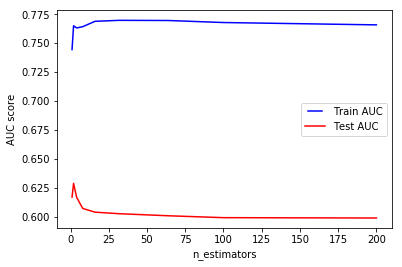

In [46]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

##### We can see that for our data, we can stop at 32 trees as increasing the number of trees decreases the test performance.

# max_depth

max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/l

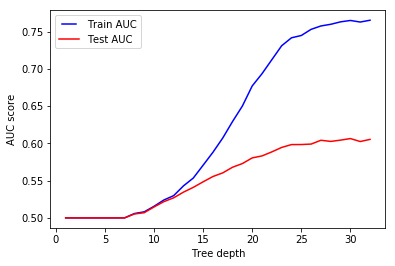

In [47]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')

line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

##### We see that our model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data

# min_samples_split

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/l

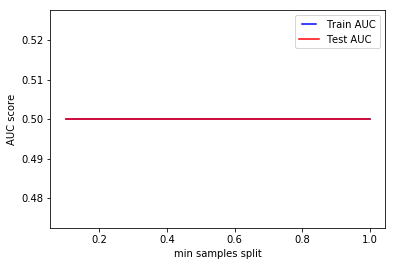

In [48]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

##### We can clearly see that the AUC score is same for each split level that we defined. So this parameter doesn't need tuning or to be set.

# min_samples_leaf

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/l

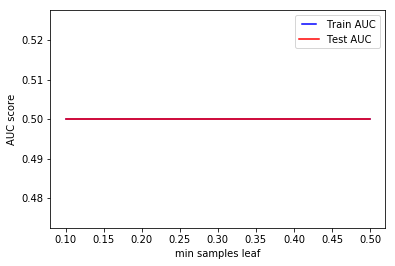

In [49]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [50]:
##### Same conclusion as to previous parameter. 

# max_features

max_features represents the number of features to consider when looking for the best split.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/PythonData/l

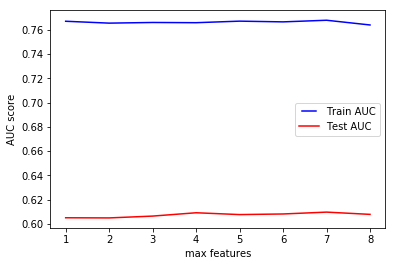

In [52]:
max_features = list(range(1,df2.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

### This is an overfitting case. It’s unexpected to get overfitting for all values of max_features. However, according to sklearn documentation for random forest, the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

# Random Hyperparameter Grid

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 24, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 24, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(random_grid)

{   'bootstrap': [True, False],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]}


In [65]:
total_settings = 2 * 12 * 2 * 3 * 3 * 12
print (total_settings)

5184


On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 x 12 x 2 x 3 x 3 x 12 = 5184 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

# Random Search Training
Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [68]:
rf_random.best_params_

{'n_estimators': 12,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': False}

### From these results, we should be able to narrow the range of values for each hyperparameter.

# Evaluate Random Search

To determine if random search yielded a better model, we compare the base model with the best random search model.

In [92]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_test, y_test)
print ("base model score: " + str(base_accuracy))

base model score: 0.9232591437588551


In [93]:
best_random = rf_random.best_estimator_
random_accuracy = best_random.score(X_test, y_test)
print ("best random model score: " + str(random_accuracy))

best random model score: 0.9304257217178797


In [94]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.78%.


# Alternative method for hyperparameter tuning

## Grid Search with Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search.

In [95]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [2, 4, 6, 8, 10, 12, 14],
#     'max_features': [2, 3],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [5, 10, 15, 20]
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [96]:
# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

In [97]:
# grid_search.best_params_

# Significance of individual features

In [98]:
sorted(zip(best_random.feature_importances_, feature_names), reverse=True)

[(0.28482862327962183, 'loan_amount'),
 (0.23109731581580215, 'country_coef'),
 (0.20182522483247115, 'term_in_months'),
 (0.1265870556698406, 'activity_coef'),
 (0.07317589872526199, 'sector_coef'),
 (0.04449565123813975, 'gender_male'),
 (0.03309988408646713, 'gender_female'),
 (0.00489034635239543, 'gender_group')]

# The Random Forest Model Score

In [99]:
predictions1 = base_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.43      0.22      0.29      9529
           1       0.94      0.98      0.96    123868

   micro avg       0.92      0.92      0.92    133397
   macro avg       0.69      0.60      0.63    133397
weighted avg       0.91      0.92      0.91    133397



In [100]:
predictions2 = best_random.predict(X_test)

print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.58      0.10      0.17      9529
           1       0.93      0.99      0.96    123868

   micro avg       0.93      0.93      0.93    133397
   macro avg       0.76      0.55      0.56    133397
weighted avg       0.91      0.93      0.91    133397



In [101]:
# Save the model
import pickle

filename = 'ML-Model-Set2-8-RandomForest-best-random-model-trained.h5'

pickle.dump(best_random, open(filename, 'wb'))